# rSVD

In [6]:
import numpy as np
from scipy.linalg import svd
from timeit import default_timer as timer
import matplotlib.pyplot as plt


In [107]:
def rsvd(matrix, k, oversample=10):
    """Perform randomized SVD on a given matrix.
    
    Args:
        matrix (np.ndarray): Input matrix to perform SVD on.
        k (int): Number of singular values/vectors to compute.
        oversample (int): Number of extra samples to take.
    
    Returns:
        Tuple of matrices U, S, and V^T such that matrix = U @ np.diag(S) @ V^T.
    """
    # Compute the shape of the input matrix.
    m, n = matrix.shape

    # Generate a random Gaussian matrix with shape (n, k + oversample).
    omega = np.random.randn(n, k + oversample)

    # Form the sample matrix Y.
    y = matrix @ omega

    # Compute the QR decomposition of Y.
    q, _ = np.linalg.qr(y)

    # Compute the matrix B = Q^T @ A.
    b = q.T @ matrix

    # Compute the SVD of B.
    u_tilde, s, v = svd(b, full_matrices=False)

    # Compute the matrix U = Q @ U_tilde.
    u = q @ u_tilde

    # Return the SVD factors.
    return u[:,:k], s[:k], v[:k,:]

In [108]:
np.random.seed(0)
n_rows = 100
n_cols = 100
matrix1 = np.random.uniform(low = 0, high = 5, size=(n_rows, n_cols))

In [126]:
def time_svd_and_rsvd(matrix,k):
    '''time taken by svd of scipy and the Randomised-SVD
    Args:
    matrix (np.ndarray): Input matrix to perform SVD on.
        k (int): Number of singular values/vectors to compute.
    Returns:
    '''
    svd_start = timer()
    u,s,v = svd(matrix) #SVD using scipy module
    u_k,s_k,v_k = u[:,:k], s[:k], v[:k,:]
    svd_end = timer()
    print("time taken by svd of scipy is {} ms ".format((svd_end-svd_start)*1000.0))
    
    start = timer()
    u_rsvd,s_rsvd,v_rsvd = rsvd(matrix,k) #Randomised-SVD to return k singular values and vectors to compute
    end = timer()
    print("time taken by Randomised svd of is {} ms ".format((end-start)*1000.0))
    # print("svd shape", u_k.shape)
    # print("svd shape", np.diag(s_k).shape)
    # print("svd shape", v_k.shape)
    # print("rsvd shape ", (u_rsvd @ np.diag(s_rsvd) @ v_rsvd).shape)

    svd_error = np.linalg.norm((u_k @ np.diag(s_k) @ v_k))
    rsvd_error = np.linalg.norm((u_rsvd @ np.diag(s_rsvd) @ v_rsvd))

    return (svd_end-svd_start)*1000.0, (end-start)*1000.0#, svd_error, rsvd_error
    

In [151]:
np.random.seed(1)
svd_time, rsvd_time = time_svd_and_rsvd(matrix1,10)
np.random.seed(0)
# n_rows = 100
# n_cols = 100
# matrix1 = np.random.uniform(low = 0, high = 5, size=(n_rows, n_cols))
svd_times = []
rsvd_times = []
sizes=[100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
for i in sizes:
  matrix1 = np.random.uniform(low = -20, high = 20, size=(i, i))
  svd_t, rsvd_t = time_svd_and_rsvd(matrix1,int(i/10))
  svd_times.append(svd_t)
  rsvd_times.append(rsvd_t)

time taken by svd of scipy is 216.00520700030756 ms 
time taken by Randomised svd of is 6.466327999987698 ms 
time taken by svd of scipy is 6.325669999569072 ms 
time taken by Randomised svd of is 1.4238109997677384 ms 
time taken by svd of scipy is 17.585128000064287 ms 
time taken by Randomised svd of is 4.517637999924773 ms 
time taken by svd of scipy is 30.622824000602122 ms 
time taken by Randomised svd of is 7.592214999931457 ms 
time taken by svd of scipy is 50.481351000598806 ms 
time taken by Randomised svd of is 8.092973000202619 ms 
time taken by svd of scipy is 79.79339200028335 ms 
time taken by Randomised svd of is 26.0839880002095 ms 
time taken by svd of scipy is 120.0231069997244 ms 
time taken by Randomised svd of is 13.476948000061384 ms 
time taken by svd of scipy is 176.34337499930552 ms 
time taken by Randomised svd of is 19.047170000703773 ms 
time taken by svd of scipy is 247.99523900037457 ms 
time taken by Randomised svd of is 23.783720999745128 ms 
time taken

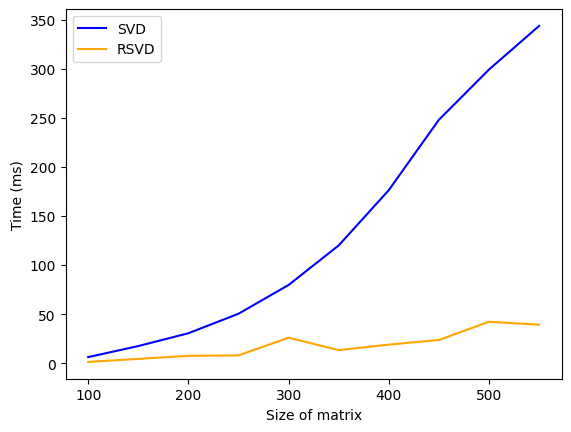

In [152]:
plt.plot(sizes, svd_times, color='blue', label="SVD")
plt.plot(sizes, rsvd_times, color='orange', label="RSVD")
plt.legend()
plt.ylabel("Time (ms)")
plt.xlabel("Size of matrix")
plt.show()

# grSVD

In [311]:
import numpy as np
from scipy.linalg import svd
from timeit import default_timer as timer
from numpy.linalg import qr
import seaborn as sns

In [312]:
def grsvd(matrix, k, oversample=4):
    """Perform randomized SVD on a given matrix.
    
    Args:
        matrix (np.ndarray): Input matrix to perform SVD on.
        k (int): Number of singular values/vectors to compute.
        oversample (int): Number of extra samples to take.
    
    Returns:
        Tuple of matrices U, S, and V^T such that matrix = U @ np.diag(S) @ V^T.
    """
    # Compute the shape of the input matrix.
    m, n = matrix.shape

    # Generate a random Gaussian matrix with shape (n, k + oversample).
    mu = np.mean(matrix, axis=0)

    # calculate the covariance matrix K using the formula

    K = (1/m) * ((matrix - mu.reshape(1, -1)).T @ (matrix - mu.reshape(1, -1)))
    omega = np.random.multivariate_normal(mu,K,k+oversample).T

    # Form the sample matrix Y.
    y = matrix @ omega

    # Compute the QR decomposition of Y.
    q, _ = np.linalg.qr(y)

    # Compute the matrix B = Q^T @ A.
    b = q.T @ matrix

    # Compute the SVD of B.
    u_tilde, s, v = svd(b, full_matrices=False)

    # Compute the matrix U = Q @ U_tilde.
    u = q @ u_tilde

    # Return the SVD factors.
    return u[:,:k], s[:k], v[:k,:]

In [313]:
# Define the range of x and y values
x_min, x_max = -1, 1
y_min, y_max = -1, 1

# Define the number of points in the x and y directions
num_points_x, num_points_y = 1000, 1000

# Create the meshgrid
x_vals = np.linspace(x_min, x_max, num_points_x)
y_vals = np.linspace(y_min, y_max, num_points_y)
xx, yy = np.meshgrid(x_vals, y_vals)

# Evaluate the function at each point in the meshgrid
z_vals = np.cos(10 * (xx*2 + yy)) * np.sin(10 * (xx + yy*2))

# Print the shape of the meshgrid and the function values
print("Shape of meshgrid: ", xx.shape)
print("Shape of function values: ", z_vals.shape)

Shape of meshgrid:  (1000, 1000)
Shape of function values:  (1000, 1000)


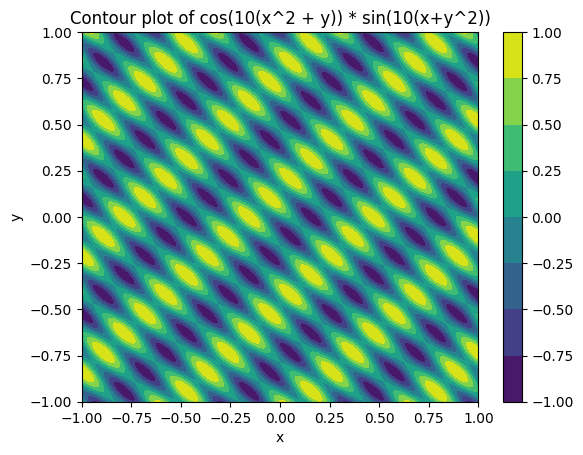

In [314]:
# Create a contour plot of the function over the meshgrid
plt.contourf(xx, yy, z_vals, cmap='viridis')

# Add a colorbar to the plot
plt.colorbar()

# Add labels and a title to the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of cos(10(x^2 + y)) * sin(10(x+y^2))')

# Show the plot
plt.show()

In [322]:
u,s,v=grsvd(z_vals,3)
outs=(u @ (np.diag(s) @ v))

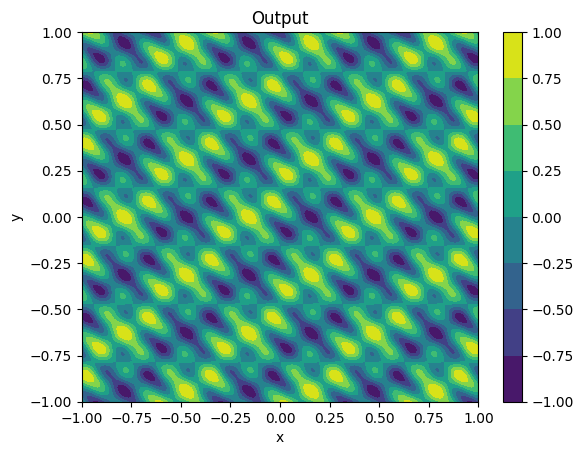

In [323]:
# Create a contour plot of the function over the meshgrid
plt.contourf(xx, yy, outs, cmap='viridis')

# Add a colorbar to the plot
plt.colorbar()

# Add labels and a title to the plot
plt.xlabel('x')
plt.ylabel('y')
plt.title('Output')

# Show the plot
plt.show()

<ipython-input-326-aa2f5b3c2414>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(tem)


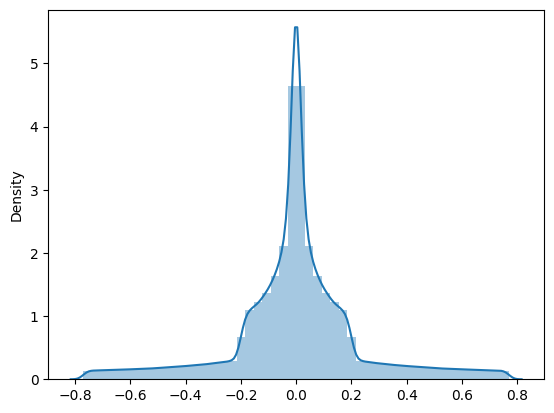

In [326]:
tem = (outs - z_vals).reshape(-1)
_ = sns.distplot(tem)

# GRSVD vs RSVD :-

In [194]:
mat = np.random.uniform(-100,100,size=(512,512))

In [295]:
mat

array([[-12.7535529 , -90.9630922 ,  75.14303326, ..., -47.07781843,
         58.00036853, -85.38333483],
       [-85.02056601,  36.79188529,  36.68624172, ..., -86.26031275,
         64.98348012,  69.59281794],
       [  8.23194506, -11.40458851,  59.08277238, ...,  41.81171023,
         68.73223632, -68.37257624],
       ...,
       [-97.25668008,  13.50880601, -28.28569181, ..., -88.38120544,
         62.58215612, -16.76652856],
       [-88.62449492,   9.86803382, -14.17327084, ...,   1.10519346,
        -83.76707804,  15.77058529],
       [ 68.17077739, -85.90043813, -54.04426598, ...,  94.19843954,
         -1.74580285, -62.75254971]])

In [207]:
def grsvd(matrix, k, omega, oversample=10):
    """Perform randomized SVD on a given matrix.
    
    Args:
        matrix (np.ndarray): Input matrix to perform SVD on.
        k (int): Number of singular values/vectors to compute.
        oversample (int): Number of extra samples to take.
    
    Returns:
        Tuple of matrices U, S, and V^T such that matrix = U @ np.diag(S) @ V^T.
    """
    # Compute the shape of the input matrix.
    m, n = matrix.shape

    # # mentioned in research paper to do separately, as sampling time high, but we can pre compute it
    # # Generate a random Gaussian matrix with shape (n, k + oversample).
    # mu = np.mean(matrix, axis=0)

    # # calculate the covariance matrix K using the formula
    # imt_mat=(matrix - mu.reshape(1, -1))

    # K = (imt_mat.T @ imt_mat)/m

    # omega = np.random.multivariate_normal(mu,K,k+oversample).T

    # Form the sample matrix Y.
    y = matrix @ omega

    # Compute the QR decomposition of Y.
    q, _ = np.linalg.qr(y)

    # Compute the matrix B = Q^T @ A.
    b = q.T @ matrix

    # Compute the SVD of B.
    print(b.shape)
    u_tilde, s, v = svd(b, full_matrices=False)

    # Compute the matrix U = Q @ U_tilde.
    u = q @ u_tilde

    # Return the SVD factors.
    return u[:,:k], s[:k], v[:k,:]

In [212]:
def rsvd(matrix, k, omega, oversample=10):
    """Perform randomized SVD on a given matrix.
    
    Args:
        matrix (np.ndarray): Input matrix to perform SVD on.
        k (int): Number of singular values/vectors to compute.
        oversample (int): Number of extra samples to take.
    
    Returns:
        Tuple of matrices U, S, and V^T such that matrix = U @ np.diag(S) @ V^T.
    """
    # Compute the shape of the input matrix.
    m, n = matrix.shape

    # Generate a random Gaussian matrix with shape (n, k + oversample).
    # # told in research paper to do precompute
    # omega = np.random.randn(n, k + oversample)

    # Form the sample matrix Y.
    y = matrix @ omega

    # Compute the QR decomposition of Y.
    q, _ = np.linalg.qr(y)

    # Compute the matrix B = Q^T @ A.
    b = q.T @ matrix

    # Compute the SVD of B.
    print(b.shape)
    u_tilde, s, v = svd(b, full_matrices=False)

    # Compute the matrix U = Q @ U_tilde.
    u = q @ u_tilde

    # Return the SVD factors.
    return u[:,:k], s[:k], v[:k,:]

In [256]:
def grsvd_vs_rsvd(matrix,k,oversmpl):
    '''time taken by svd of scipy and the Randomised-SVD
    Args:
    matrix (np.ndarray): Input matrix to perform SVD on.
        k (int): Number of singular values/vectors to compute.
    Returns:
    '''
    svd_start = timer()
    u,s,v = svd(matrix) #SVD using scipy module
    u_k,s_k,v_k = u[:,:k], s[:k], v[:k,:]
    svd_end = timer()
    print("time taken by   svd is {} ms ".format((svd_end-svd_start)*1000.0))

    omg = np.random.randn(matrix.shape[1], k + oversmpl)
    rsvd_start = timer()
    u,s,v = rsvd(matrix, k, omg,oversmpl) #SVD using scipy module
    u_rsvd,s_rsvd,v_rsvd = u[:,:k], s[:k], v[:k,:]
    rsvd_end = timer()
    print("time taken by  rsvd is {} ms ".format((rsvd_end-rsvd_start)*1000.0))
    
    # Generate a random Gaussian matrix with shape (n, k + oversample).
    mu = np.mean(matrix, axis=0)
    # calculate the covariance matrix K using the formula
    imt_mat=(matrix - mu.reshape(1, -1))
    K = (imt_mat.T @ imt_mat)/matrix.shape[0]
    omg = np.random.multivariate_normal(mu,K,k+oversmpl).T
    # omega found
    start = timer()
    u_grsvd,s_grsvd,v_grsvd = grsvd(matrix,k,omg,oversmpl) #Randomised-SVD to return k singular values and vectors to compute
    end = timer()
    print("time taken by grsvd is {} ms ".format((end-start)*1000.0))

    alpha = np.linalg.norm((u_rsvd @ np.diag(s_rsvd) @ v_rsvd))
    beta = np.linalg.norm((u_k @ np.diag(s_k) @ v_k))
    rsvd_error_ratio = np.abs(alpha-beta)/beta
    alpha = np.linalg.norm((u_grsvd @ np.diag(s_grsvd) @ v_grsvd))
    grsvd_error_ratio = np.abs(alpha-beta)/beta

    return (rsvd_end-rsvd_start)*1000.0, (end-start)*1000.0, rsvd_error_ratio, grsvd_error_ratio

In [261]:
grsvd_vs_rsvd(mat, 50, 25)

time taken by   svd is 200.24844399995345 ms 
(75, 512)
time taken by  rsvd is 19.146242999340757 ms 
(75, 512)
time taken by grsvd is 44.22137300025497 ms 


(19.146242999340757,
 44.22137300025497,
 0.17823051441663118,
 0.10160553464370027)

In [262]:
grsvd_vs_rsvd(mat, 50, 30)

time taken by   svd is 348.68854700107477 ms 
(80, 512)
time taken by  rsvd is 43.502635999175254 ms 
(80, 512)
time taken by grsvd is 50.856428999395575 ms 


(43.502635999175254,
 50.856428999395575,
 0.16793892016759696,
 0.09536476988778701)

In [267]:
grsvd_vs_rsvd(mat, 50, 35)

time taken by   svd is 314.2762320003385 ms 
(85, 512)
time taken by  rsvd is 50.62989500038384 ms 
(85, 512)
time taken by grsvd is 53.816469000594225 ms 


(50.62989500038384, 53.816469000594225, 0.162765483292974, 0.0876244384896662)

In [277]:
grsvd_vs_rsvd(mat, 50, 40)

time taken by   svd is 148.44189399991592 ms 
(90, 512)
time taken by  rsvd is 21.56271000058041 ms 
(90, 512)
time taken by grsvd is 37.84025599998131 ms 


(21.56271000058041, 37.84025599998131, 0.15661414646969757, 0.0812835092583465)

In [278]:
grsvd_vs_rsvd(mat, 50, 45)

time taken by   svd is 158.32043800037354 ms 
(95, 512)
time taken by  rsvd is 20.727781999084982 ms 
(95, 512)
time taken by grsvd is 32.14862699860532 ms 


(20.727781999084982, 32.14862699860532, 0.148092822719423, 0.08047066446975022)

In [279]:
grsvd_vs_rsvd(mat, 50, 50)

time taken by   svd is 164.41575799944985 ms 
(100, 512)
time taken by  rsvd is 21.146488999875146 ms 
(100, 512)
time taken by grsvd is 32.859445998838055 ms 


(21.146488999875146,
 32.859445998838055,
 0.14998700193712933,
 0.0763872134859571)

In [283]:
grsvd_vs_rsvd(mat, 50, 55)

time taken by   svd is 336.7000250000274 ms 
(105, 512)
time taken by  rsvd is 62.13433300035831 ms 
(105, 512)
time taken by grsvd is 72.73906699992949 ms 


(62.13433300035831,
 72.73906699992949,
 0.14107815632933146,
 0.07004697432761166)

In [292]:
no_samples = [25, 30, 35, 40, 45, 50, 55]
rsvd_times = [19.146242999340757, 43.502635999175254, 50.62989500038384, 51.56271000058041, 50.727781999084982, 51.146488999875146, 62.13433300035831]
grsvd_times = [44.22137300025497, 50.856428999395575, 50.62989500038384, 67.84025599998131, 62.14862699860532, 62.859445998838055, 72.73906699992949]

rsvd_error = [0.17823051441663118, 0.16793892016759696, 0.162765483292974, 0.15661414646969757, 0.148092822719423, 0.14998700193712933, 0.14107815632933146]
grsvd_error = [0.10160553464370027, 0.09536476988778701, 0.0876244384896662, 0.0812835092583465, 0.08047066446975022, 0.0763872134859571, 0.07004697432761166]

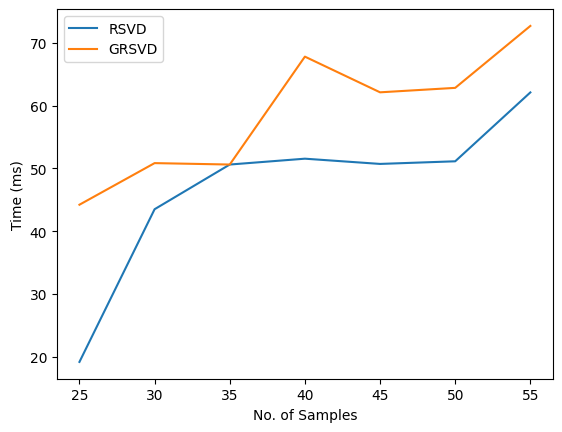

In [293]:
plt.plot(no_samples, rsvd_times, label="RSVD")
plt.plot(no_samples, grsvd_times, label="GRSVD")
plt.legend()
plt.xlabel("No. of Samples")
plt.ylabel("Time (ms)")
plt.show()

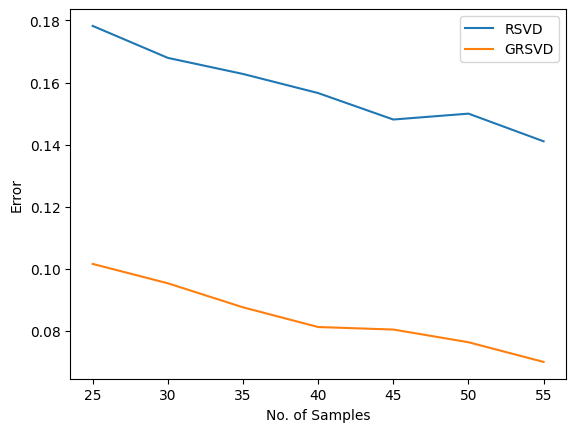

In [294]:
plt.plot(no_samples, rsvd_error, label="RSVD")
plt.plot(no_samples, grsvd_error, label="GRSVD")
plt.legend()
plt.xlabel("No. of Samples")
plt.ylabel("Error")
plt.show()